#IMDb Top Rated Movies

Data Science Applied to Real-Life Problems, Course 2022-23 <br>
@author Oscar Julian Ponte (oscar.julian) <br>
@author Rafael Morera Jeeninga (rafael.morera)

## Context
The dataset from *imdb_movies.csv* contains top 250 rated movies on IMDb of the year 2022, providing a snapshot of the most popular and highly rated movies of recent times.

We want to analyze this dataset to provide insights of the best movies over the years and try to understand their evolution.

**Column Description**
* rank: Rank of the movie.
* name: Name of the movie.
* year: Release year.
* decade: Decade of the relese year.
* rating: IMDb rating of the movie.
* genre: Genre of the movie.
* certificate: Certificate of the movie.
* run_time: Total movie run time.
* budget: Budget of the movie.
* box_office:	Total box office collection across the world (total amount of money paid by people worldwide).
* directors: Director(s) of the movie

## Questions
1. Describe with descriptive statistics the basic features of the attributes and write what you see.
2. Show using histograms the numerical attributes that you consider most appropriate to understand the data set. Write down your conclusions. Remember that a histogram displays numerical data by grouping data into "bins" of equal width, each bin is represented as a bar, and the number of bins depends on the data.
3. Show using boxplots the numerical attributes that you consider most appropriate to understand the data set. One group of boxplots has to show the behavior of each attribute according to its genre and another group of boxplots has to show the behavior of each attribute according to its decade. Write down your conclusions.
4. Analyze if there is any correlation between the numerical attributes. Convert to numeric the categorical attributes that you think might be interesting to analyze as well. Write down your conclusions.
5. Add any other analysis you think is relevant to explain this data set.

## Answers

### Load dataset from *imdb_movies.csv*
Load dataset from csv file in a DataFrame using Pandas library

In [1]:
#Load libraries
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

#Create a data frame from the file
movies = pd.read_csv("imdb_movies.csv")

print("Variable Type: ", type(movies))

Variable Type:  <class 'pandas.core.frame.DataFrame'>


Our movies variable contains the data and is already structured in pandas format so it will not need to be converted and it will be much easier to perform the exploration

### Question 1
Describe with descriptive statistics the basic features of the attributes and write what you see.

In [2]:
#Number of original records using the len() function and .shape
print("Number of registers: ", len(movies))
print("Dataset size: ", movies.shape)

Number of registers:  250
Dataset size:  (250, 11)


In [3]:
movies.columns

Index(['rank', 'name', 'year', 'decade', 'rating', 'genre', 'certificate',
       'run_time', 'budget', 'box_office', 'directors'],
      dtype='object')

In [4]:
#Check the data types
movies.dtypes

rank           float64
name            object
year             int64
decade         float64
rating         float64
genre           object
certificate     object
run_time       float64
budget         float64
box_office     float64
directors       object
dtype: object

We observe 11 different columns, which will be the variables that describe each movie, represented by each row.
Of the columns, we can see that there are 6 of them with numeric with decimals, one with integer values and the rest are information in categorical or text format.

In [5]:
#Some descriptive statistics of each attribute
movies.describe()

,rank,year,decade,rating,run_time,budget,box_office
count,250.000000,250.000000,250.000000,250.000000,244.000000,2.350000e+02,2.310000e+02
mean,125.500000,1986.360000,1981.760000,8.307200,128.991803,3.579183e+07,2.292172e+08
std,72.312977,25.125356,25.144211,0.229081,30.335028,5.540446e+07,3.741993e+08
min,1.000000,1921.000000,1920.000000,8.000000,45.000000,1.800000e+03,6.700000e+01
25%,63.250000,1966.250000,1960.000000,8.100000,107.000000,3.000000e+06,7.594127e+06
50%,125.500000,1994.000000,1990.000000,8.200000,127.000000,1.460000e+07,6.061198e+07
75%,187.750000,2006.000000,2000.000000,8.400000,145.250000,4.000000e+07,3.138956e+08
max,250.000000,2022.000000,2020.000000,9.300000,238.000000,3.560000e+08,2.799439e+09


With the 'count' column we can see that there are some missing values in the data set (on columns 'run_time', 'budget' and 'box_office'.
In the 'mean' column we see the means of each column, so we can have an idea of the typical value of each attribute. For example, it is interesting to see the 'rating' column in which we have an average of 8,31, so we confirm that most of the films in the group have a high rating.<br>
Other things that we can see are that the oldest movie in the dataset was released in 1021 and the most recent in 2022. We also can study the 'budget' where we can see that the mean of this column is 35.79 million dollars, with a standard deviation of 55.40 million dollars. With a minimun budget of 1,800 dollars and a maximum of 365 million dolars, that indicates a wide range of budgets among the movies in the dataset.<br>
Thanks to the describe, we can get a first general idea of the data that is given to us in this dataset and make a first superficial analysis.

###Question 2
Show using histograms the numerical attributes that you consider most appropriate to understand the data set. Write down your conclusions. Remember that a histogram displays numerical data by grouping data into "bins" of equal width, each bin is represented as a bar, and the number of bins depends on the data.

In [6]:
# We remove null records with the .dropna() function
movies_clean = movies.dropna()

# We ensure how many final samples we have
print("Number of registers without nulls: ", len(movies_clean))

Number of registers without nulls:  220


To better understand the dataset and gain insights into its contents, we have chosen to analyze several key attributes. These attributes include the movie's release year, decade, rating, runtime, budget, and box office revenue. <br>
By examining these attributes, we can gain an understanding of the trends and patterns within the data set, such as which decades produced the most highly rated movies or whether there is a correlation between a movie's budget and its box office success. <br>
Additionally, these attributes are all numerical in nature, making them well-suited for analysis using techniques such as histograms and descriptive statistics. By focusing on these attributes, we hope to gain a comprehensive understanding of the dataset and draw meaningful conclusions from our analysis.

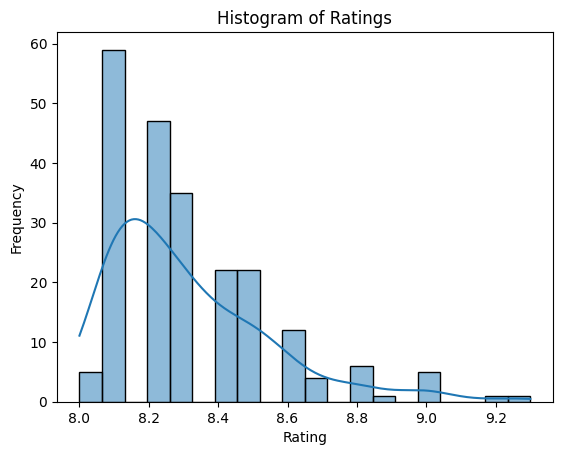

In [7]:
# Distribution of rating (class attribute)
sns.histplot(data=movies_clean, x='rating', kde=True, bins=20)
plt.title('Histogram of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

The distribution of movie ratings is slightly skewed to the left, indicating that most movies in the dataset have high ratings. The majority of movies have a rating between 8.0 and 8.5.

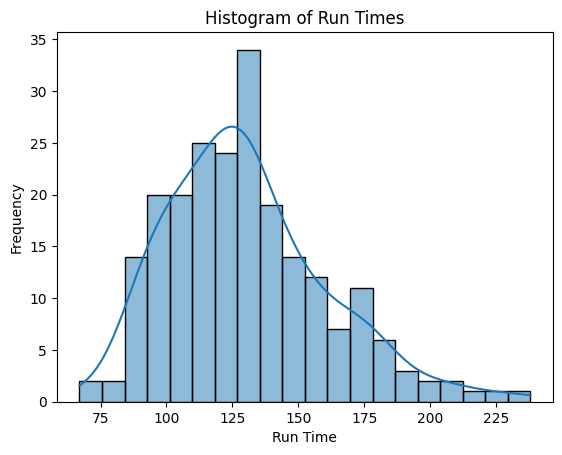

In [8]:
# Distribution of run times (class attribute)
sns.histplot(data=movies_clean, x='run_time', kde=True, bins=20)
plt.title('Histogram of Run Times')
plt.xlabel('Run Time')
plt.ylabel('Frequency')
plt.show()

The distribution of run times is roughly normal, with the majority of movies having a run time between 100 and 150 minutes.

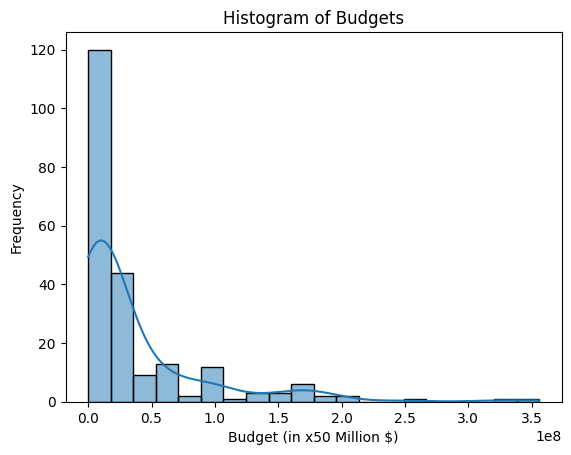

In [9]:
# Distribution of budget (class attribute)
sns.histplot(data=movies_clean, x='budget', kde=True, bins=20)
plt.title('Histogram of Budgets')
plt.xlabel('Budget (in x50 Million $)')
plt.ylabel('Frequency')
plt.show()

The distribution of budgets is highly skewed to the right, indicating that most movies in the dataset have low budgets. The majority of movies have a budget between 0 and 50 million dollars.

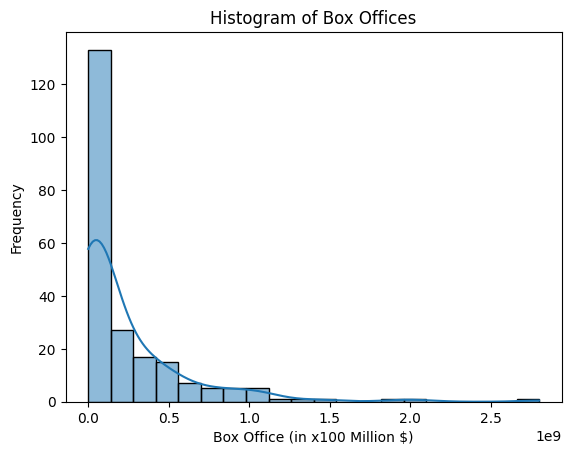

In [10]:
# Distribution of box_office (class attribute)
sns.histplot(data=movies_clean, x='box_office', kde=True, bins=20)
plt.title('Histogram of Box Offices')
plt.xlabel('Box Office (in x100 Million $)')
plt.ylabel('Frequency')
plt.show()

The distribution of box offices is highly skewed to the right, indicating that most movies in the dataset have low box office earnings. The majority of movies have a box office between 0 and 200 million dollars.

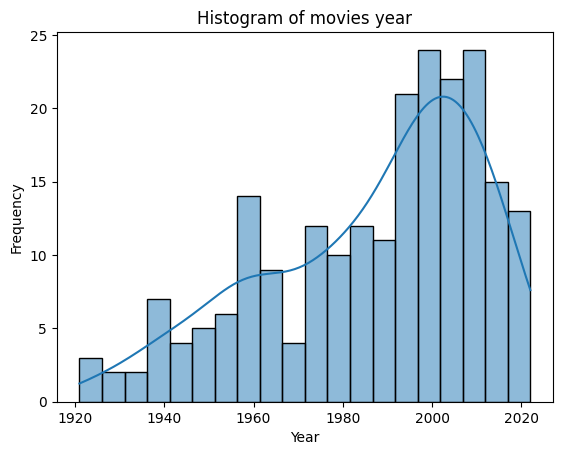

In [11]:
# Distribution of years (class attribute)
sns.histplot(data=movies_clean, x='year', kde=True, bins=20)
plt.title('Histogram of movies year')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.show()

There is another numerical histogram that we consider is very interesting, because we can see which years are the ones where more movies high rated where made. As we can see in the figure above, around the 2000's where when more high rated films where recorded.

###Question 3
Show using boxplots the numerical attributes that you consider most appropriate to understand the data set. One group of boxplots has to show the behavior of each attribute according to its genre and another group of boxplots has to show the behavior of each attribute according to its decade. Write down your conclusions.


By creating boxplots for each numerical attribute in the dataset, we can gain a better understanding of the distribution of values for each attribute and identify any trends or patterns across different genres and decades. This information can help us make more informed decisions when analyzing and interpreting the data.

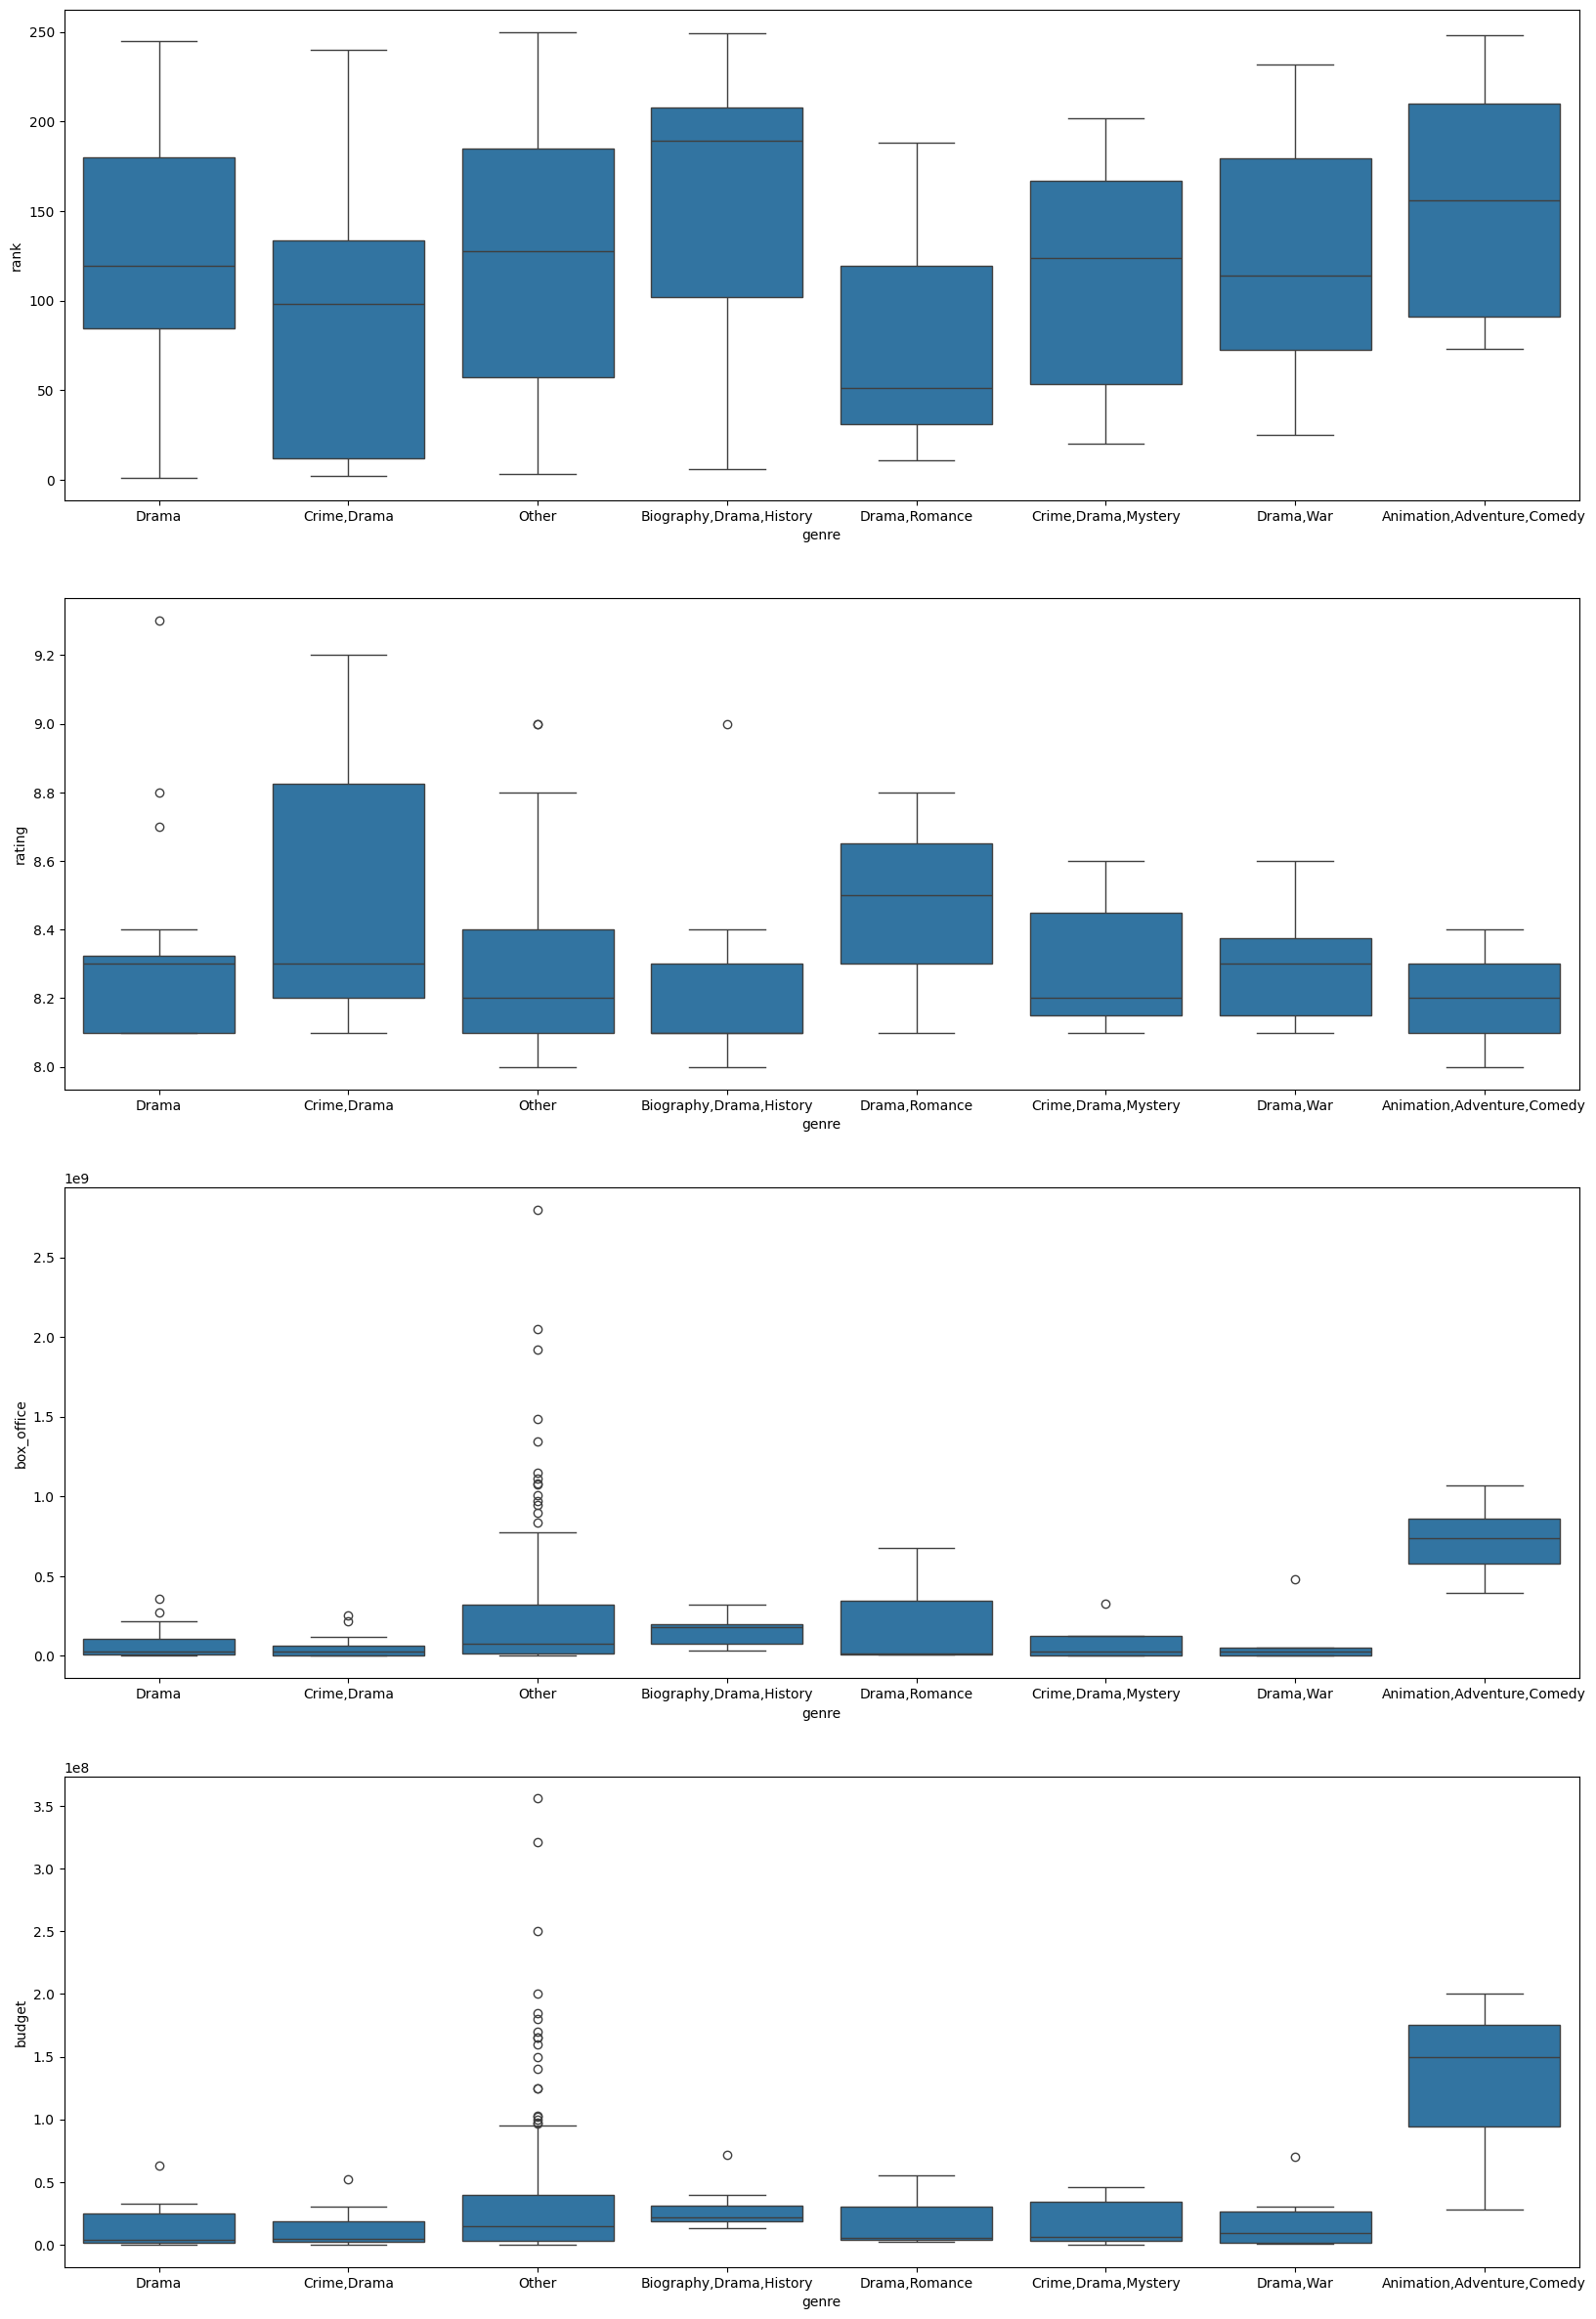

In [12]:
# We are going to visualize the boxplots by Genre to evaluate if the variables are differentiable
# num_attributes = ['rank', 'year', 'decade', 'rating', 'run_time', 'budget', 'box_office']
fig, axs = plt.subplots(4, 1, figsize=(20, 30))

sns.boxplot(data=movies_clean, x='genre', y='rank', ax=axs[0])
sns.boxplot(data=movies_clean, x='genre', y='rating', ax=axs[1])
sns.boxplot(data=movies_clean, x='genre', y='box_office', ax=axs[2])
sns.boxplot(data=movies_clean, x='genre', y='budget', ax=axs[3])

plt.show()


Analyzing the boxplots, we can see that the three most relevant attributes are ranking, box office and rating. These three attributes show a significant variation between genres, indicating that they can help us understand how different movie genres perform in terms of success and reception. Ranking can give us an idea of how a particular genre is perceived in comparison to others, while box office and rating can provide information on the commercial success and critical acclaim of movies within a genre. <br>
In addition to the three attributes previously mentioned, budget is also an important factor to consider. A film's budget can have a significant impact on its overall success and performance, as higher budget films are typically able to attract top-tier talent, invest in better production values, and engage in more extensive marketing campaigns. This can lead to higher box office earnings and greater critical acclaim. Therefore, understanding how budget varies across different genres can provide valuable insights into the film industry and inform decisions regarding investment and production.


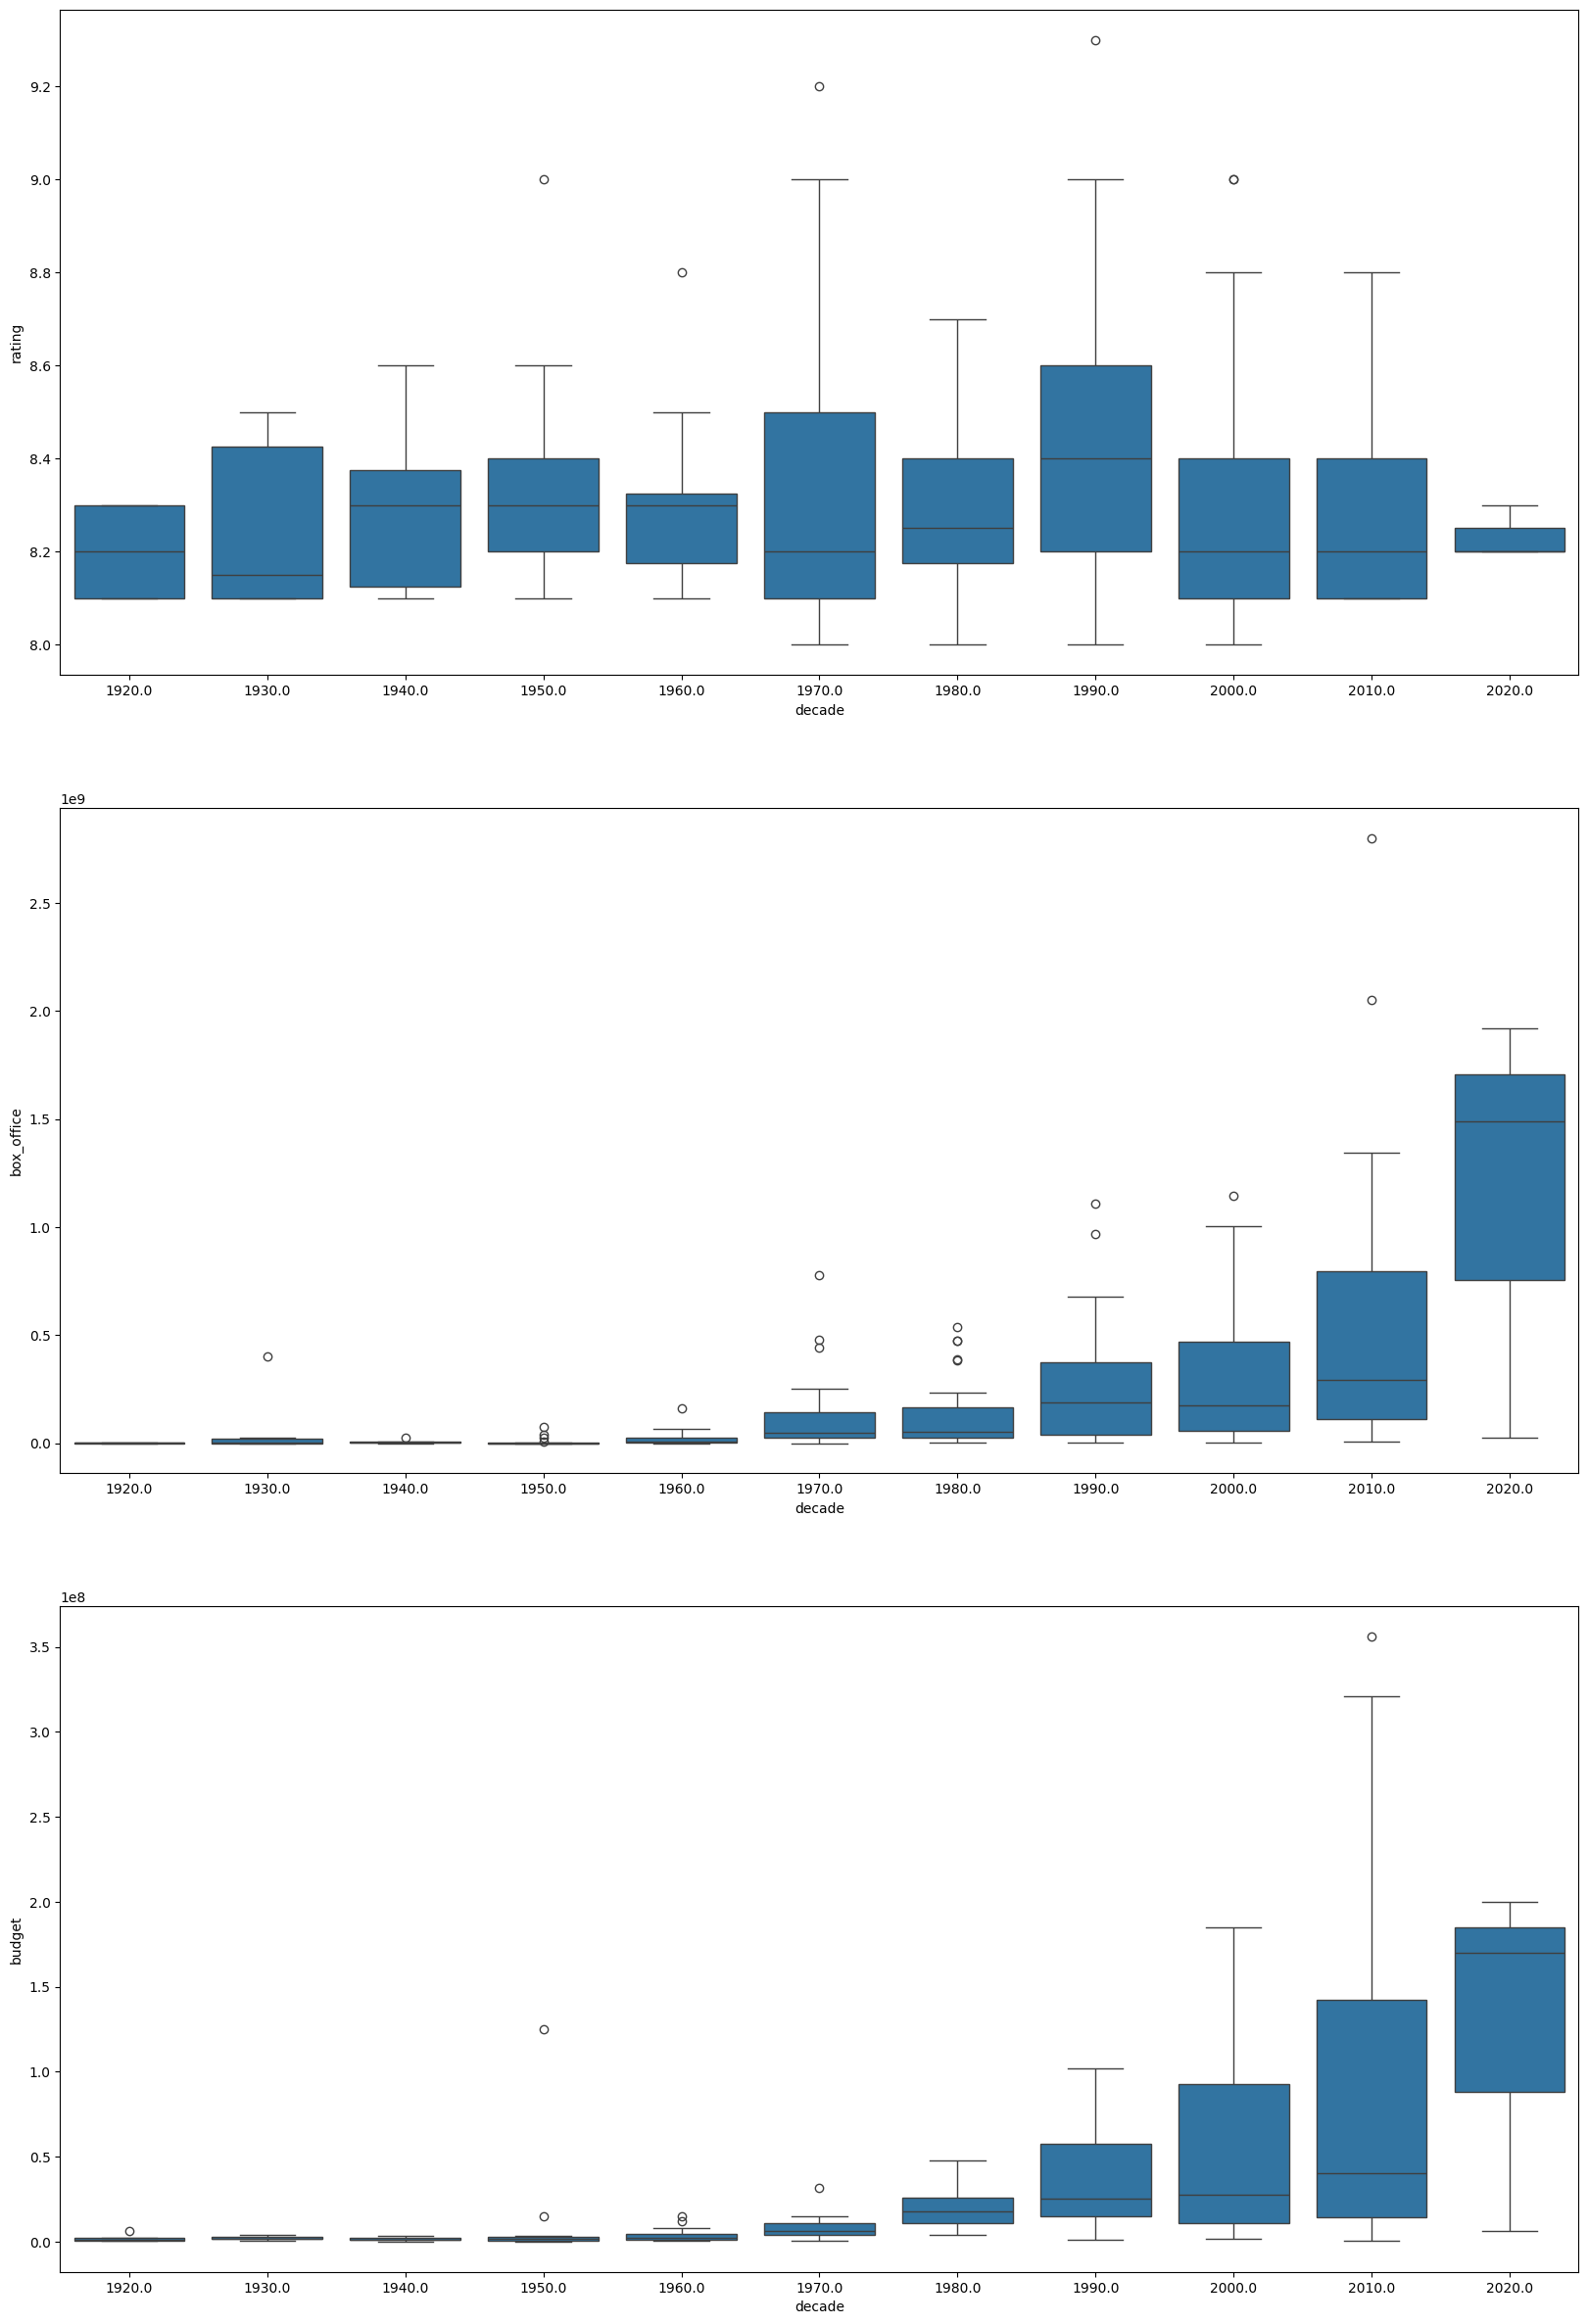

In [13]:
# We are going to visualize the boxplots by Decade.
fig, axs = plt.subplots(3, 1, figsize=(20, 30))

sns.boxplot(data=movies_clean, x='decade', y='rating', ax=axs[0])
sns.boxplot(data=movies_clean, x='decade', y='box_office', ax=axs[1])
sns.boxplot(data=movies_clean, x='decade', y='budget', ax=axs[2])

plt.show()

These attributes might be the most interesting to analyze based on decade because they can help us understand how movies have evolved over time. The length of the film, the budget, and the box office may indicate changes in the way films are made and marketed. For example, a decrease in the length of the film could indicate a change in public taste, while an increase in the budget could indicate a greater interest from the industry in producing films with special effects. In addition, the box office can provide information on which films have been the most commercially successful in each decade, which can help understand audience preferences at different times.

###Question 4
Analyze if there is any correlation between the numerical attributes. Convert to numeric the categorical attributes that you think might be interesting to analyze as well. Write down your conclusions.

After analyzing which non-numerical attributes we can convert into numerical ones, the only attribute that could be useful for studying a correlation between numerical attributes would be that of genre.

<ipython-input-14-20a4fe3d23bf>:11: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(movies_clean_num.corr(), annot = True)


<Axes: >

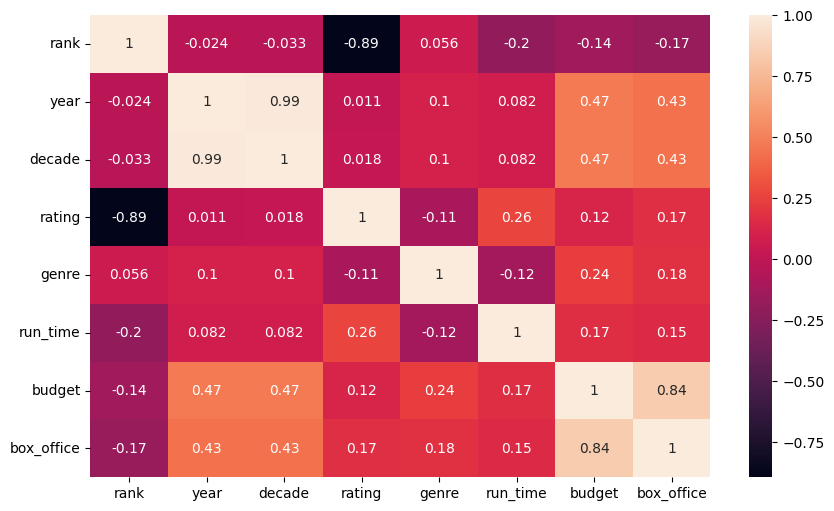

In [14]:
# We are going to make a small correlation matrix to numerically evaluate the linearity between the variables.
# object_attributes = ['name', 'genre', 'certificate', 'directors']
movies_clean_num = movies_clean.copy()
#print(movies_clean_num['genre'].unique())

movies_clean_num['genre'] = movies_clean['genre'].replace(['Drama', 'Crime,Drama', 'Other', 'Biography,Drama,History', 'Drama,Romance', 'Crime,Drama,Mystery', 'Drama,War', 'Animation,Adventure,Comedy'], [0, 1, 2, 3, 4, 5, 6, 7])
#print(movies_clean_num['genre'])

# Correlation between the dataset variables with the genre class encoded:
plt.figure(figsize = (10, 6))
sns.heatmap(movies_clean_num.corr(), annot = True)

There is a positive correlation between box_office and budget, which is expected since movies with higher budgets tend to have higher box office revenues. <br>
There is also a positive correlation between rating and box_office, indicating that movies with higher ratings tend to have higher box office revenues. <br>
There is a negative correlation between rank and box_office, suggesting that higher ranked movies may not always perform well at the box office. <br>
There is a positive correlation between run_time and budget, which could suggest that longer movies require higher budgets to produce. <br>
There is a positive correlation between rating and budget, indicating that movies with higher budgets may also have higher ratings. <br>
There is a negative correlation between rank and rating, suggesting that movies with higher ranks may not always have higher ratings. <br>
There is a positive correlation between rank and year, indicating that movies released in later years tend to have higher ranks. <br>
Overall, these correlations suggest that budget, rating, and rank are important factors in determining a movie's box office success and critical reception. <br>
Unfortunately, there is not much information that can be inferred from the correlation analysis of the 'genre' attribute as it has been converted to a categorical variable with arbitrary numerical values. This reinforces the idea that 'genre' may be a more significant factor in understanding the dataset when considered independently, rather than in relation to other numerical attributes.

###Question 5
Add any other analysis you think is relevant to explain this data set.

We believe that is interesting to see in other visual way how the different values are distributed. Attribute genre is an interesting one so we can see which genres are the best rated and which ones have been the most relevants.

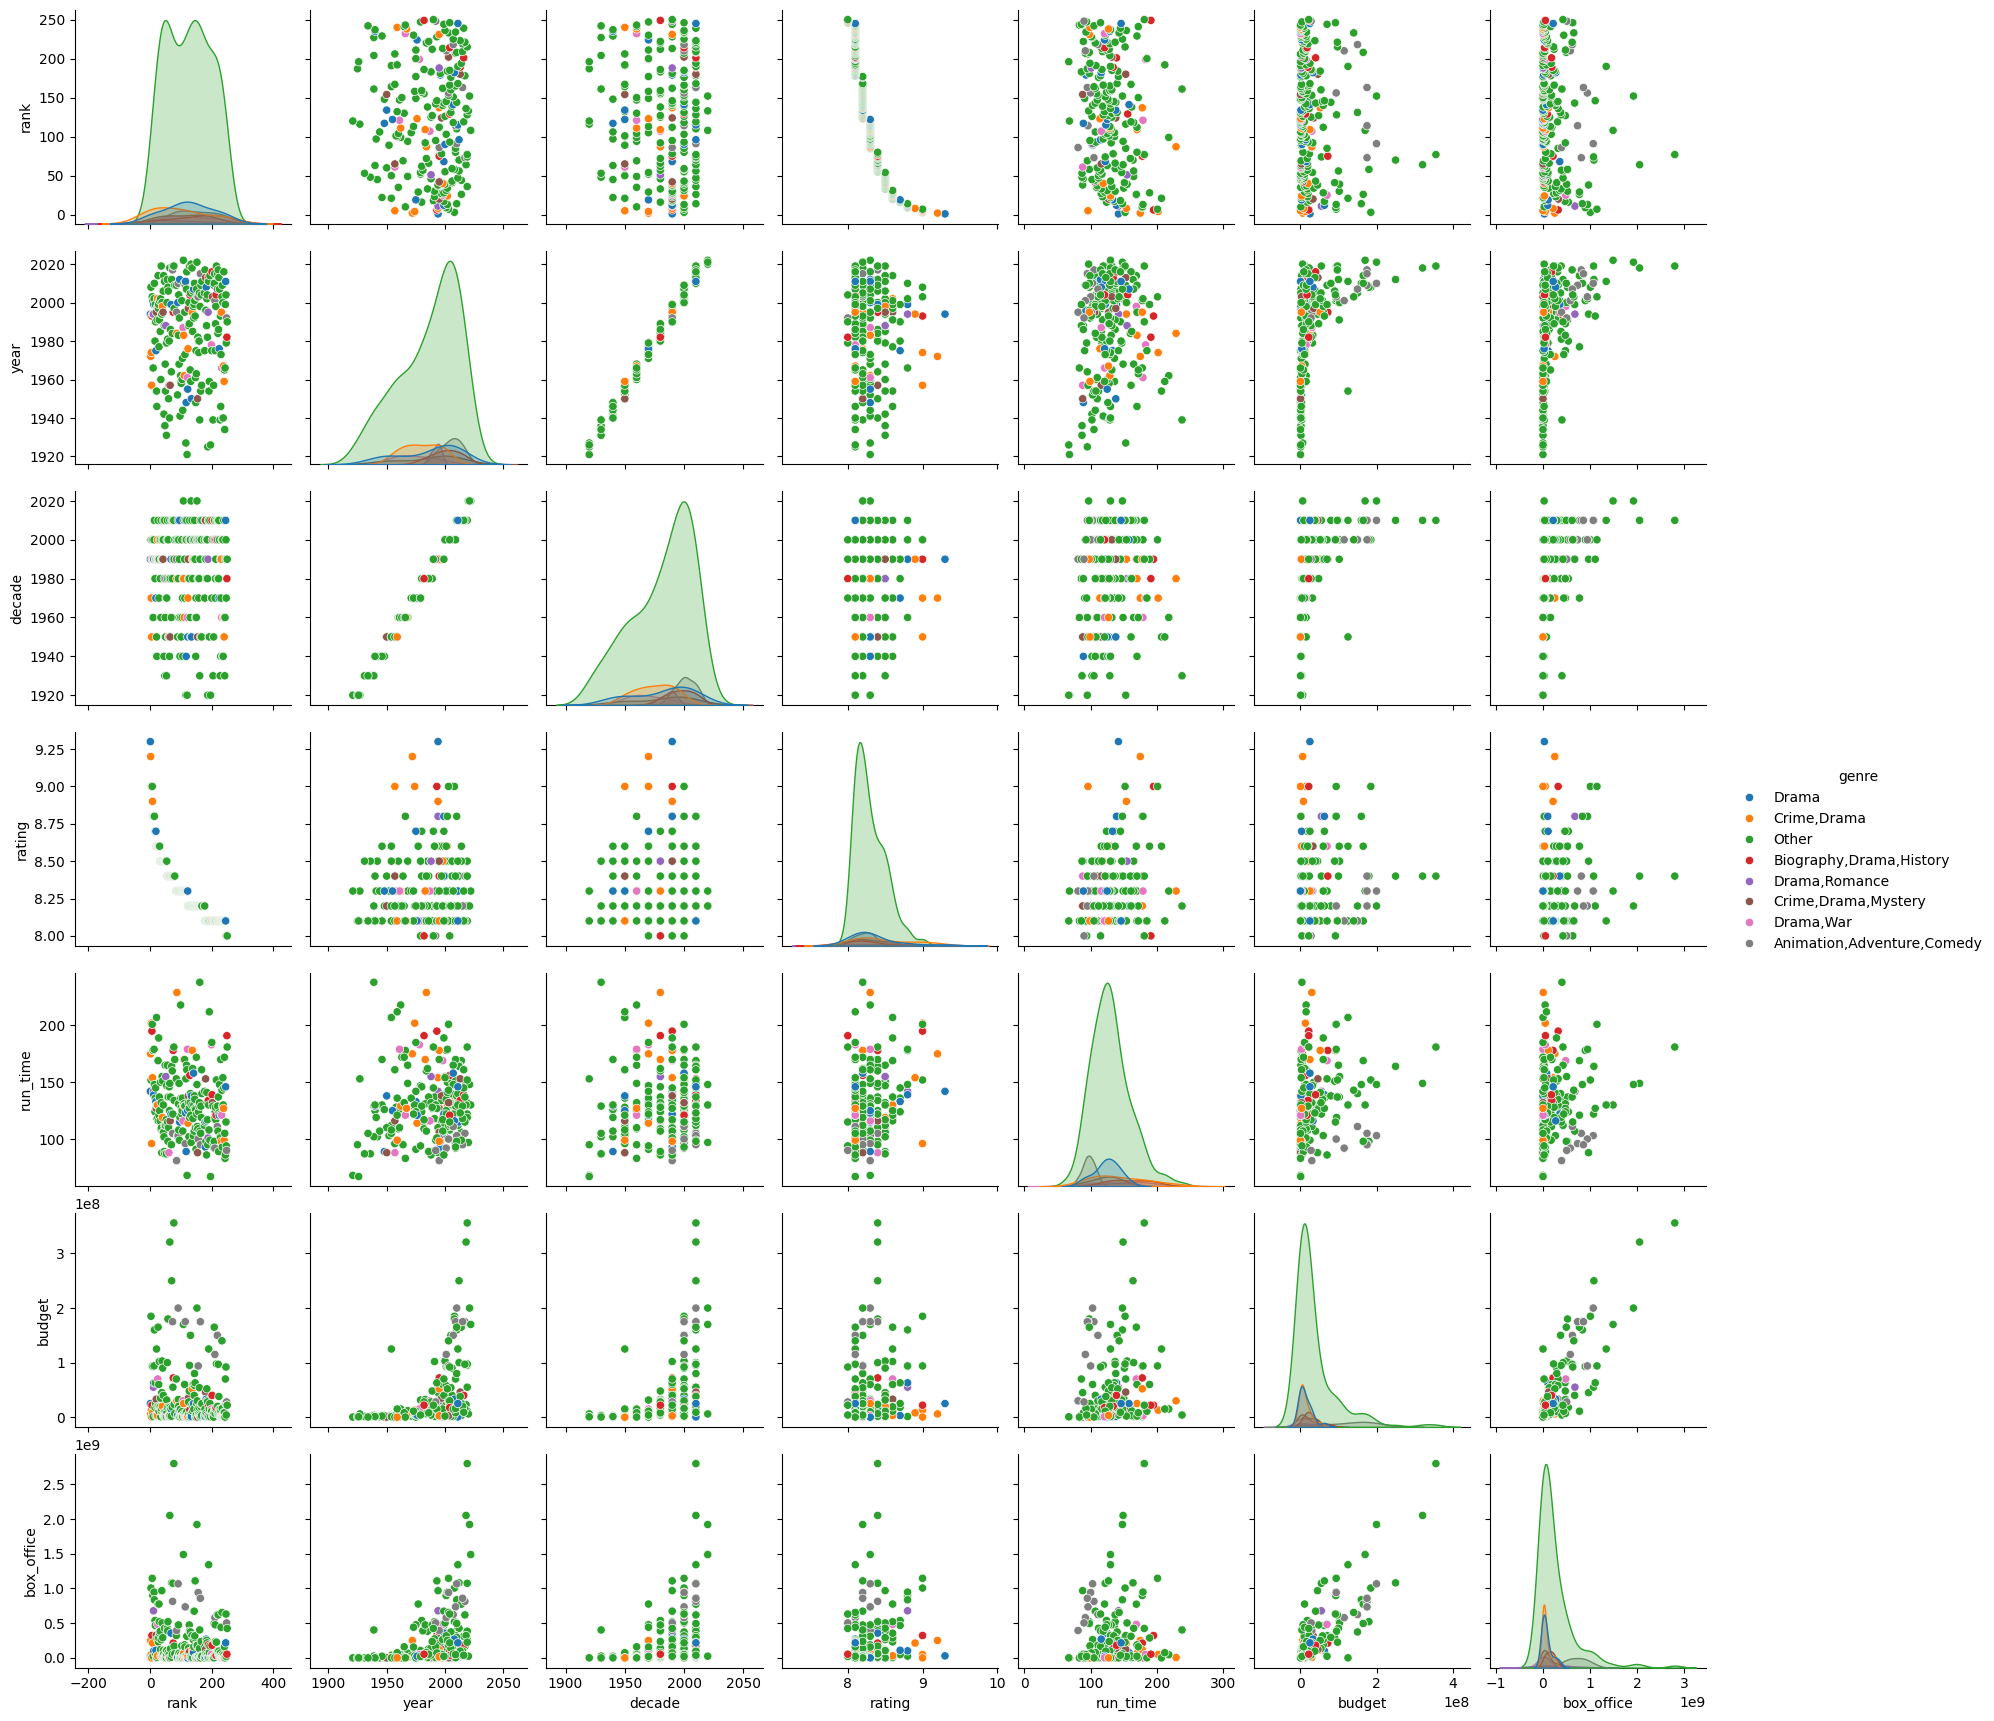

In [15]:
sns.pairplot(data = movies_clean, hue = "genre")

As we can see, there are a lot of points and we can't extract clear information at all looking at the graphics above. So, we are gonna make an analysis only taking into account an specific genre and the decade, so we will be able to see in a visual way how the different genres in the different decades where distributed.

To do so, we first look for the 3 genres that appear mostly in the dataset.

In [16]:
print(movies_clean['genre'].unique())
print(movies_clean.genre.value_counts())

['Drama' 'Crime,Drama' 'Other' 'Biography,Drama,History' 'Drama,Romance'
 'Crime,Drama,Mystery' 'Drama,War' 'Animation,Adventure,Comedy']
Other                         158
Drama                          16
Crime,Drama                    14
Animation,Adventure,Comedy      9
Biography,Drama,History         7
Crime,Drama,Mystery             7
Drama,War                       6
Drama,Romance                   3
Name: genre, dtype: int64


We can see that other is the most used genre and it doesn't give us interesting information about the genre, so we are not gonna use the records that have this genre, so we can get a better approach of the different genres that are most used in every decade.

So, we use the 3 genres that mostly appear instead of the 'Other' one.

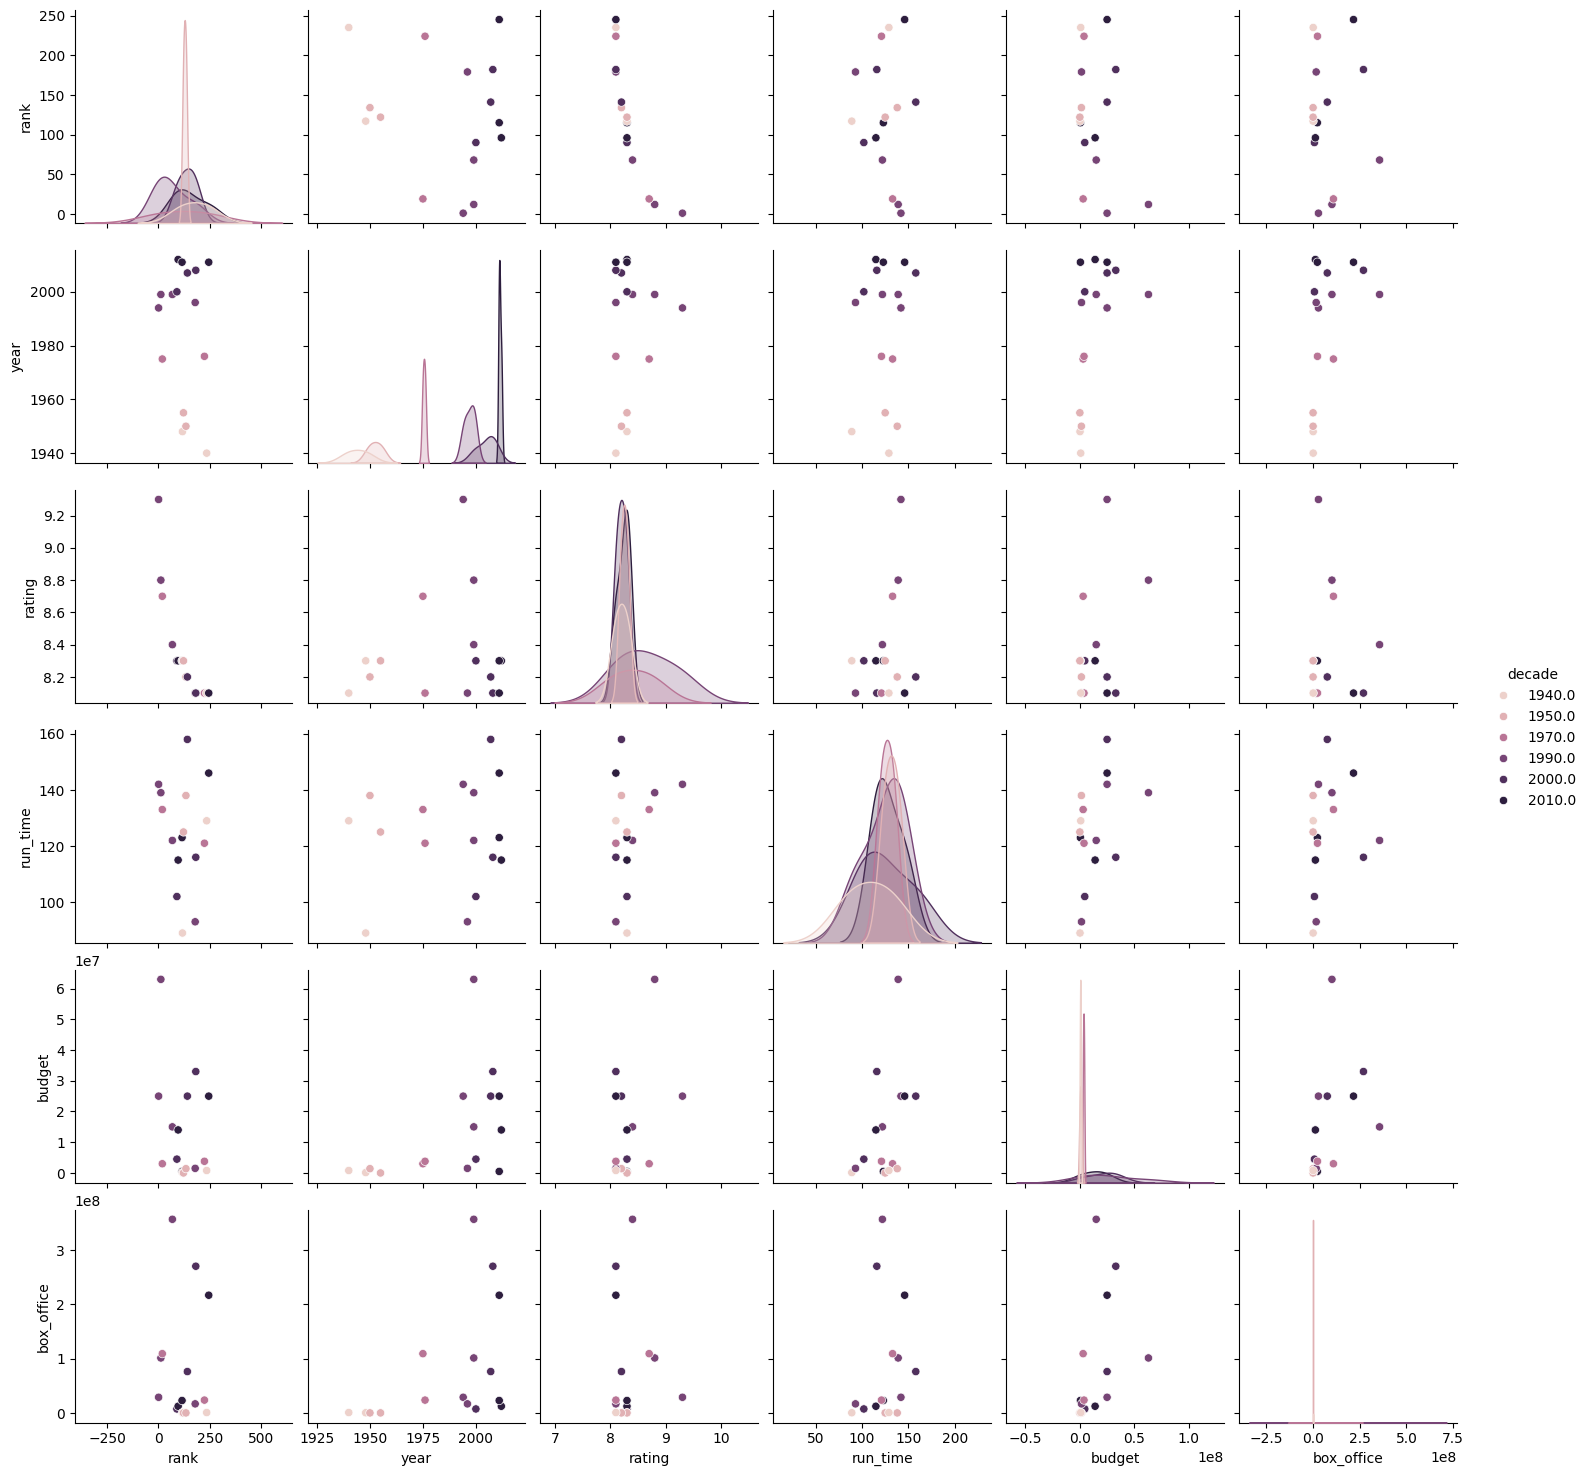

In [17]:
# We are going to select only the drama movies
movies_drama = movies_clean[movies_clean.genre == "Drama"]

# Let's now see how well they differ by genres.
sns.pairplot(data = movies_drama, hue = "decade")



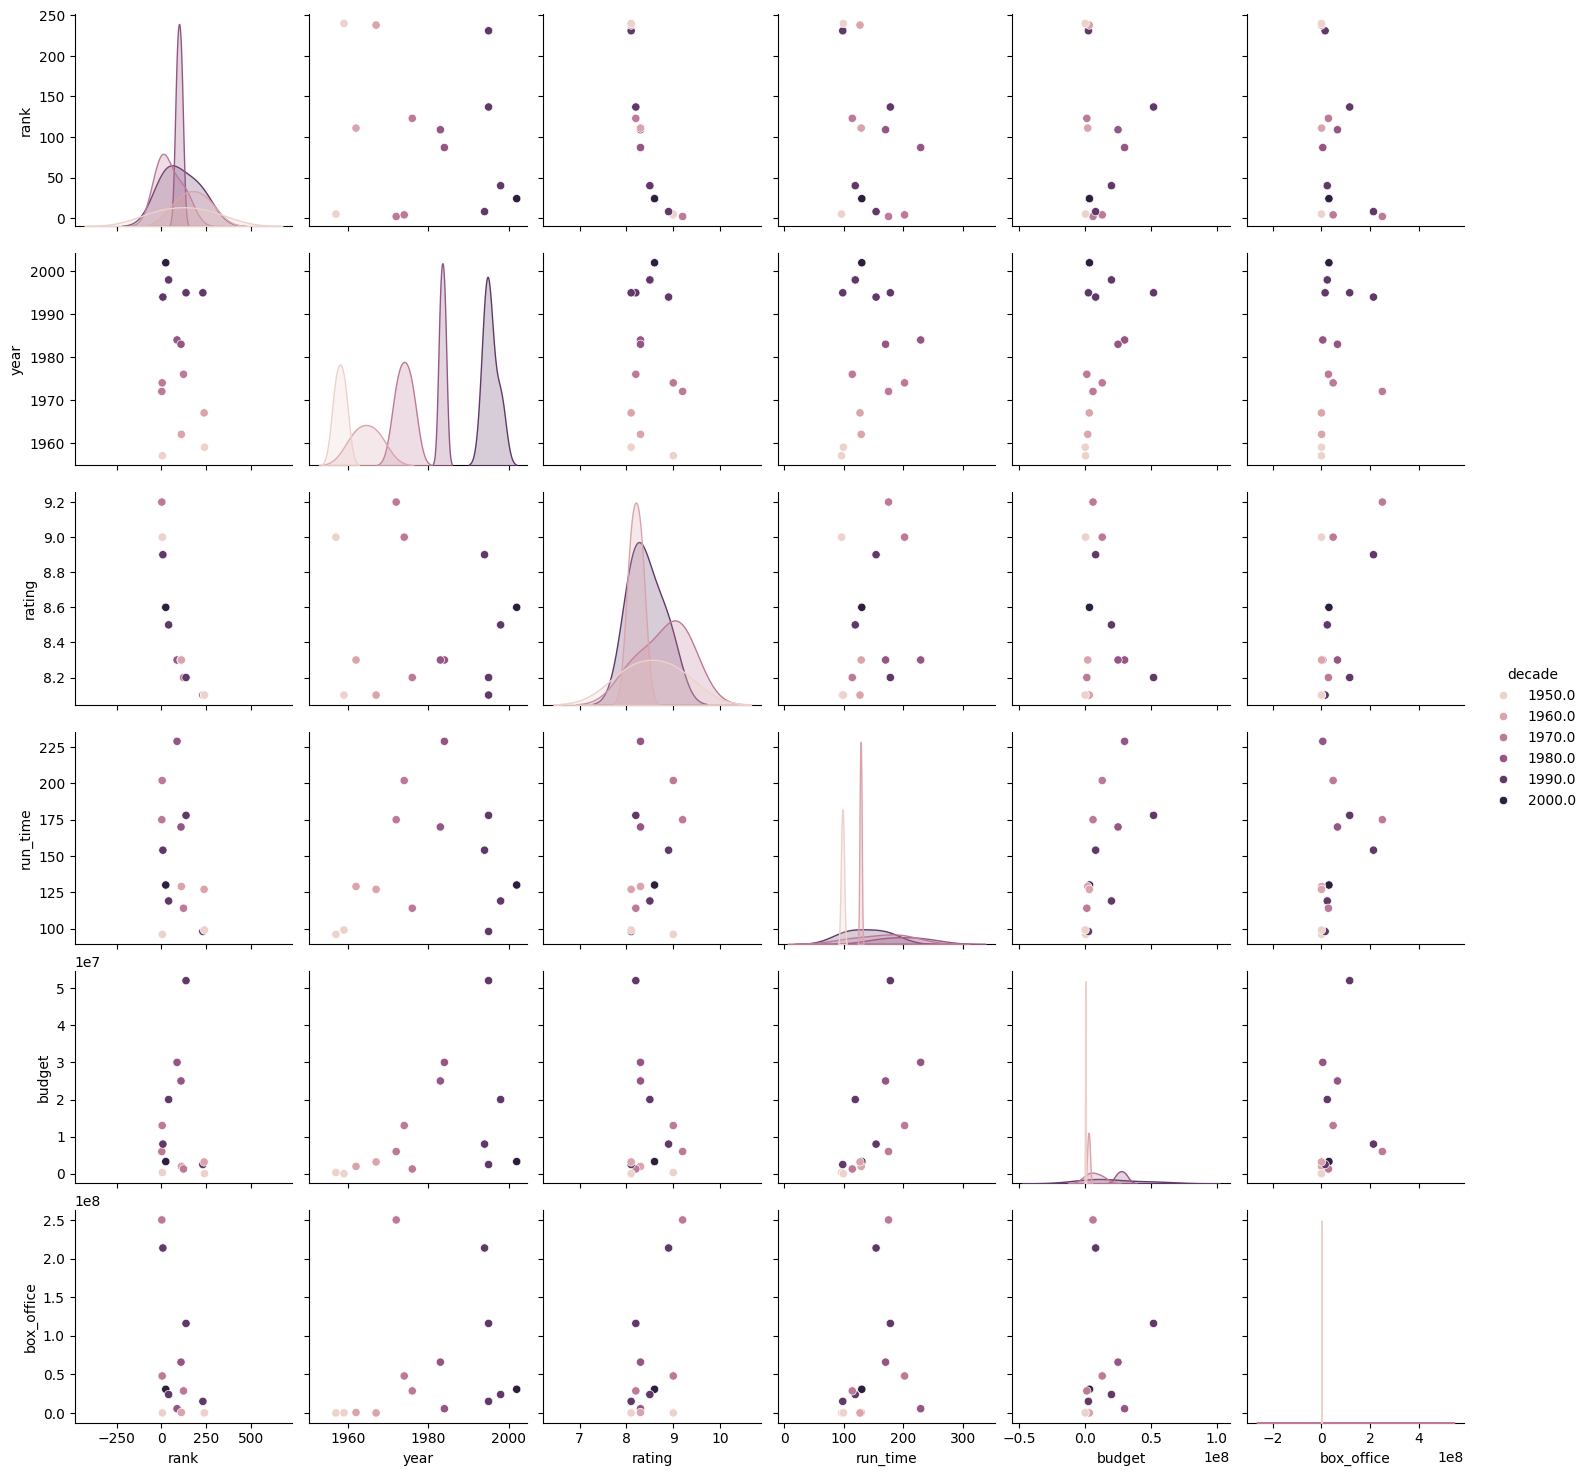

In [18]:
# We are going to select only the drama movies
movies_drama_crime = movies_clean[movies_clean.genre == "Crime,Drama"]

# Let's now see how well they differ by genres.
sns.pairplot(data = movies_drama_crime, hue = "decade")

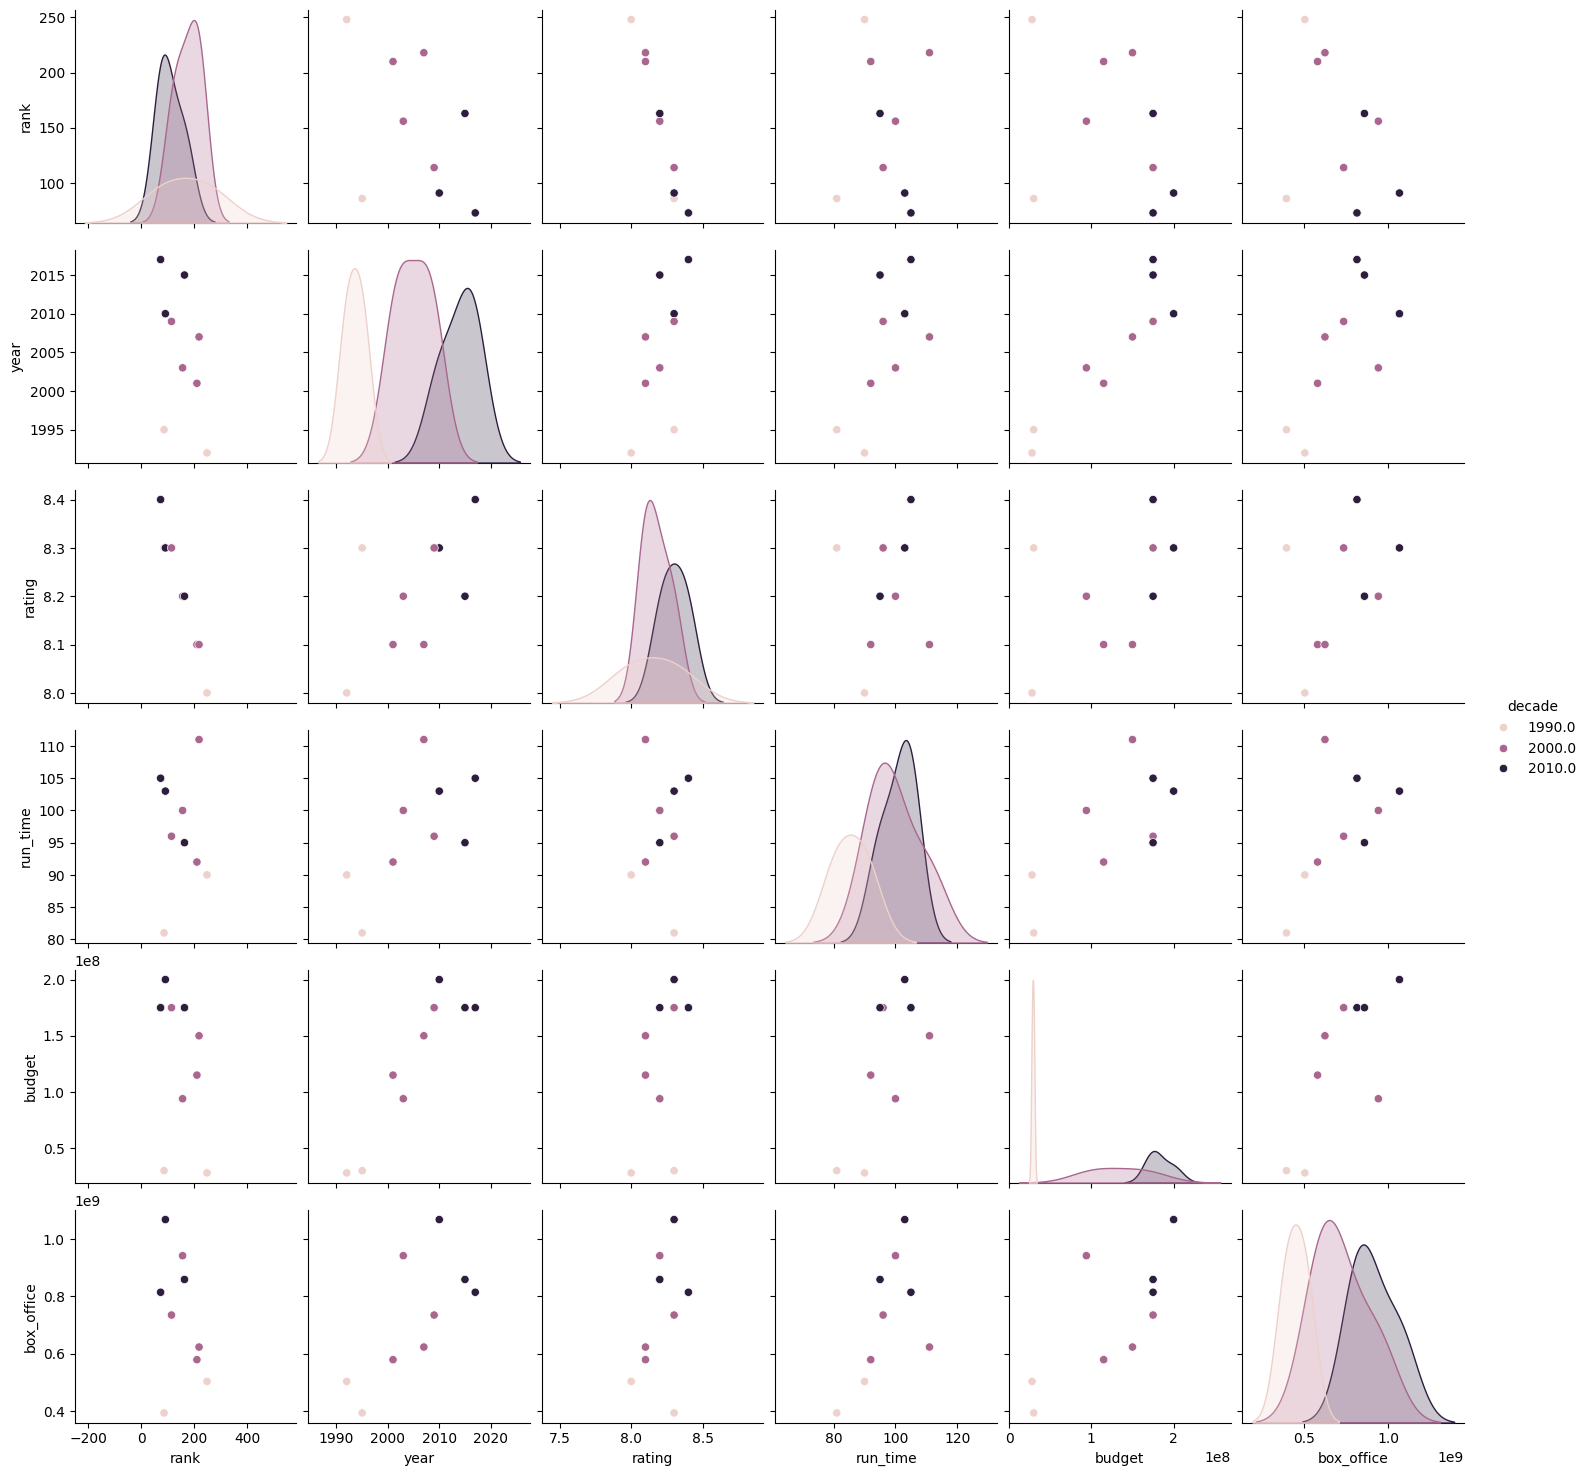

In [19]:
# We are going to select only the drama movies
movies_animation_adventure_comedy = movies_clean[movies_clean.genre == "Animation,Adventure,Comedy"]

# Let's now see how well they differ by genres.
sns.pairplot(data = movies_animation_adventure_comedy, hue = "decade")

Doing this analysis, we can see which genres that most appear in each decade in order to see how the different genres are distributed in the different decades. It's worth for knowing in a fast way which genres are the best in every decade, how the impact of each genre has changed in every decade, and know which genre is nowadays the one who is having most high ratings.